In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
# read and process the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
# transform date column into a datetime column
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [3]:
# read and process the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,75,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,84,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,84,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,69,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [4]:
# merge the charts and tracks dataset
streams_df = charts_df.merge(tracks_df, on='track_id', how='left')
streams_df = streams_df.drop(columns='track_name_y')
streams_df = streams_df.rename(columns={'track_name_x': 'track_name'})
streams_df['date']=pd.to_datetime(streams_df['date'])
streams_df.set_index("date", inplace=True)

streams_df.head()

,position,track_id,track_name,artist,streams,artist_id,artist_name,album_id,duration,release_date,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240.0,2016-11-17,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.0,0.0830,0.301,174.152
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240.0,2016-11-17,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.0,0.0830,0.301,174.152
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466.0,2016-10-28,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.0,0.0902,0.494,85.043
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466.0,2016-10-28,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.0,0.0902,0.494,85.043
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960.0,2016-07-29,...,0.524,8.0,-5.599,1.0,0.0338,0.414,0.0,0.1110,0.661,95.010


In [5]:
charts_df.shape, tracks_df.shape, streams_df.shape

((416000, 6), (4467, 19), (420460, 22))

In [6]:
#streams_df.info()

In [7]:
streams_df.describe()

,position,streams,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,420460.000000,420460.000000,420324.000000,420324.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000,420262.000000
mean,100.343814,55519.089997,228996.164126,56.617117,0.618459,0.543962,5.416826,-7.218115,0.785960,0.068791,0.345804,0.003879,0.147914,0.439020,117.220422
std,57.740670,45543.487328,49680.167354,28.449394,0.137624,0.182555,3.539879,2.767078,0.410155,0.069669,0.282184,0.040880,0.101242,0.202998,27.764570
min,1.000000,11004.000000,0.000000,0.000000,0.174000,0.025000,0.000000,-24.250000,0.000000,0.023200,0.000002,0.000000,0.021500,0.032000,50.538000
25%,50.000000,28189.000000,197436.000000,53.000000,0.524000,0.409000,2.000000,-8.624000,1.000000,0.032700,0.092300,0.000000,0.091000,0.284000,95.010000
50%,100.000000,38377.000000,218800.000000,66.000000,0.630000,0.544000,6.000000,-6.954000,1.000000,0.043100,0.268000,0.000000,0.111000,0.422000,115.457000
75%,150.000000,64914.000000,255608.000000,77.000000,0.713000,0.681000,8.000000,-5.220000,1.000000,0.070500,0.573000,0.000008,0.165000,0.570000,136.041000
max,200.000000,782316.000000,613026.000000,96.000000,0.980000,0.996000,11.000000,0.175000,1.000000,0.884000,0.994000,0.962000,0.955000,0.978000,215.090000


# EDA

## Artists

In [8]:
def plot_charts(artist):
    data1=streams_df[streams_df.artist==artist]['streams'].resample("MS").sum()/1000000
    #data2=streams_df[streams_df.artist==artist]['track_id'].resample("MS").count()
    data2=streams_df[streams_df.artist==artist]['streams'].resample("MS").sum().cumsum()/1000000
    data3=data1.pct_change()
    data4=streams_df[streams_df.artist==artist]['position'].resample("MS").mean()

    #line chart of monthly streams
    fig= plt.figure(figsize=(15,4),)
    ax1 = fig.add_subplot(141)
    ax2 = fig.add_subplot(142)
    ax3 = fig.add_subplot(143)
    ax4 = fig.add_subplot(144)
    #default is line so you can omit kind= parameter
    
    '''
    data1[:-1].plot(ax=ax1, kind='line')
    data2.plot(ax=ax2, kind='line')
    data3[:-1].plot(ax=ax3, kind='line')
    data4[:-1].plot(ax=ax4, kind='line')
    '''
    
    
    #'''
    data1.plot(ax=ax1, kind='line')
    data2.plot(ax=ax2, kind='line')
    data3.plot(ax=ax3, kind='line')
    data4.plot(ax=ax4, kind='line')
    #'''
    


    #Uncomment for cleaner x labels
    #ax1.set_xticklabels([x.strftime('%Y-%m') for x in ar_streams.index])

    #ax1.set_xlabel('Date')
    ax1.set_ylabel('common ylabel')

    ax1.set_title('Monthly Streams (%s)' % artist)
    ax2.set_title('Cumulative Streams')
    ax3.set_title('Monthly % Change')
    ax4.set_title('Avg Position')

    ax4.set_yticks([1]+np.arange(0, 210, 50).tolist())
    ax4.set_ylim([200, 1])


### OPM

#### Bands

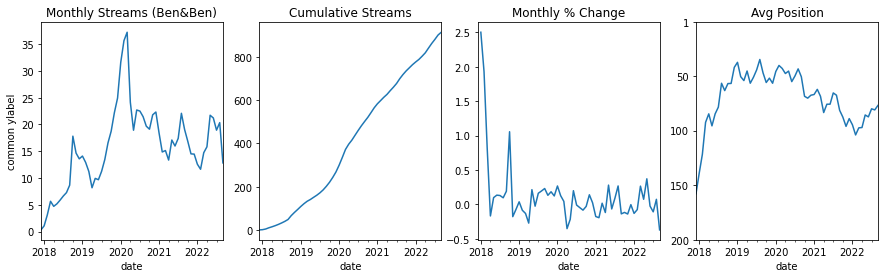

In [9]:
plot_charts("Ben&Ben")

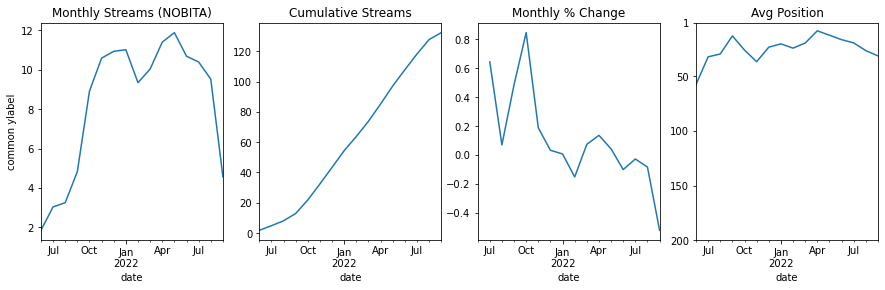

In [10]:
plot_charts("NOBITA")

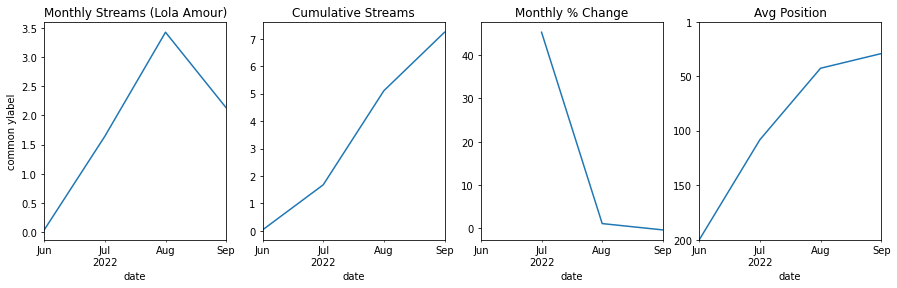

In [11]:
plot_charts("Lola Amour")

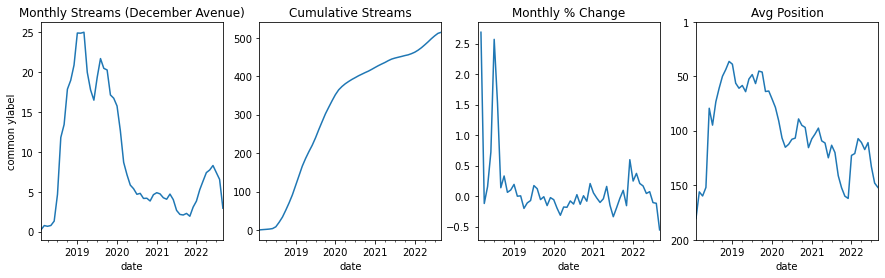

In [12]:
plot_charts("December Avenue")

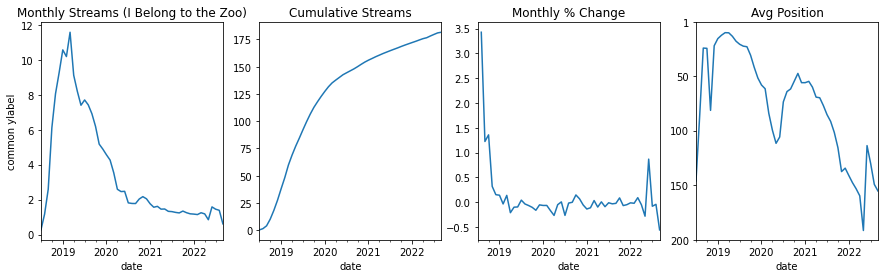

In [13]:
plot_charts("I Belong to the Zoo")

#### Male Solo Artists

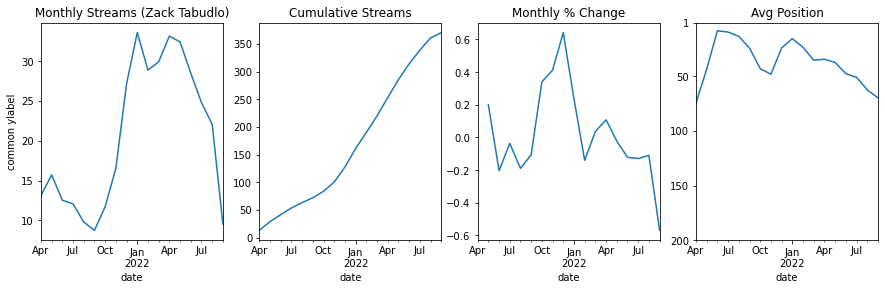

In [14]:
plot_charts("Zack Tabudlo")

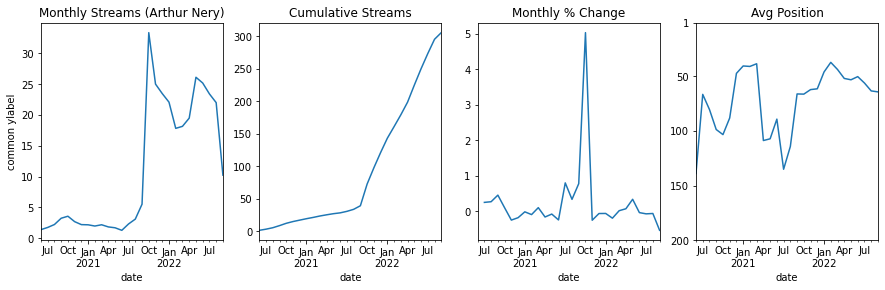

In [15]:
plot_charts("Arthur Nery")

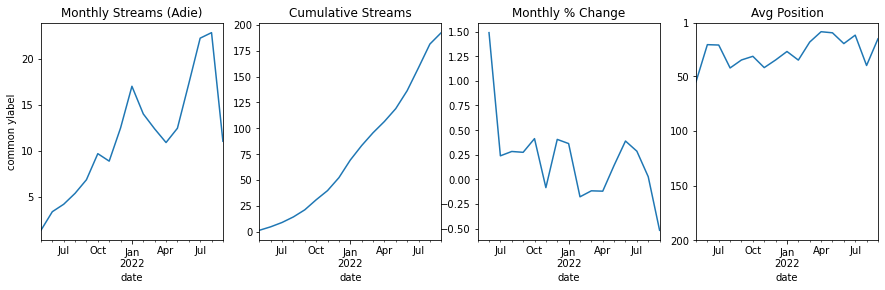

In [16]:
plot_charts("Adie")

ValueError: zero-size array to reduction operation fmin which has no identity

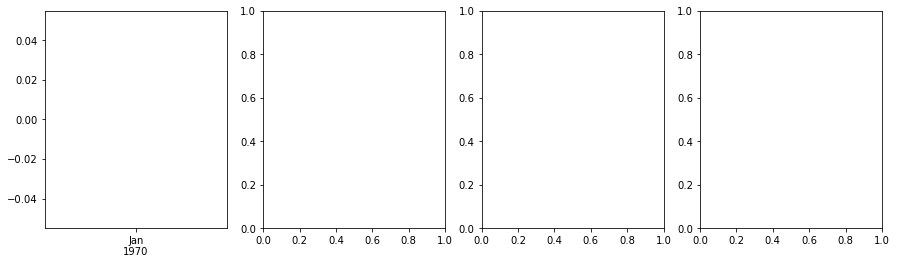

In [17]:
#plot_charts("juan carlos")

In [ ]:
plot_charts("Arthur Miguel")

In [ ]:
plot_charts("John Roa")

In [ ]:
plot_charts("Michael Pangilinan")

In [ ]:
plot_charts("Ace Banzuelo")

In [ ]:
plot_charts("Kyle Juliano")

In [ ]:
plot_charts("TJ Monterde")

### KPop

In [ ]:
plot_charts("BTS")

In [ ]:
plot_charts("SB19")

In [ ]:
tracks_list=[['j-hope', '0b1sIQumIAsNbqAoIClSpy'],
 ['V', '3JsHnjpbhX4SnySpvpa9DK'],
 ['RM', '2auC28zjQyVTsiZKNgPRGs'],
 ['NCT 127', '7f4ignuCJhLXfZ9giKT7rH'],
 ['Eric Nam', '2FLqlgckDKdmpBrvLAT5BM'],
 ['Stray Kids', '2dIgFjalVxs4ThymZ67YCE'],
 ['SEVENTEEN', '7nqOGRxlXj7N2JYbgNEjYH'],
 ['Monsta X', '4TnGh5PKbSjpYqpIdlW5nz'],
 ['GOT7', '6nfDaffa50mKtEOwR8g4df'],
 ['The Rose', '5na1LmEmK2VzNLje9snJYW'],
 ['DAY6', '5TnQc2N1iKlFjYD7CPGvFc'],
 ['NCT', '48eO052eSDcn8aTxiv6QaG'],
 ['THE BOYZ', '0CmvFWTX9zmMNCUi6fHtAx'],
 ['MAMAMOO', '0XATRDCYuuGhk0oE7C0o5G'],
 ['TAEMIN', '13rF01aOogvnkuQXOlgTW8'],
 ['WOODZ', '6y9nlaoynxSvoTGY09Vdcy'],
 ['Agust D', '5RmQ8k4l3HZ8JoPb4mNsML'],
 ['TOMORROW X TOGETHER', '0ghlgldX5Dd6720Q3qFyQB'],
 ['Jung Kook', '6HaGTQPmzraVmaVxvz6EUc'],
 ['PENTAGON', '1wKpMkucynaTfG8lyPprYV']]

for i in tracks_list:
    try:
        plot_charts(i[0])
    except ValueError:
        continue
    #print(i[0])

### Pop

In [ ]:
plot_charts("Maroon 5")

In [ ]:
plot_charts("Lauv")

In [ ]:
plot_charts("Charlie Puth")

In [ ]:
tracks_list=[['Train', '3FUY2gzHeIiaesXtOAdB7A'],
 ['The Fray', '0zOcE3mg9nS6l3yxt1Y0bK'],
 ['DNCE', '6T5tfhQCknKG4UnH90qGnz'],
 ['Hailee Steinfeld', '5p7f24Rk5HkUZsaS3BLG5F'],
 ['The Script', '3AQRLZ9PuTAozP28Skbq8V'],
 ['Nick Jonas', '4Rxn7Im3LGfyRkY2FlHhWi'],
 ['The Wanted', '2NhdGz9EDv2FeUw6udu2g1'],
 ['OneRepublic', '5Pwc4xIPtQLFEnJriah9YJ'],
 ['Jonas Brothers', '7gOdHgIoIKoe4i9Tta6qdD'],
 ['Jason Derulo', '07YZf4WDAMNwqr4jfgOZ8y'],
 ['Jason Mraz', '4phGZZrJZRo4ElhRtViYdl'],
 ['Olly Murs', '3whuHq0yGx60atvA2RCVRW'],
 ['Jonas Blue', '1HBjj22wzbscIZ9sEb5dyf'],
 ['MKTO', '2l35CQqtYRh3d8ZIiBep4v'],
 ['Zedd', '2qxJFvFYMEDqd7ui6kSAcq'],
 ['Clean Bandit', '6MDME20pz9RveH9rEXvrOM'],
 ['Jessie J', '2gsggkzM5R49q6jpPvazou'],
 ['Kelly Clarkson', '3BmGtnKgCSGYIUhmivXKWX'],
 ['Shawn Mendes', '7n2wHs1TKAczGzO7Dd2rGr'],
 ['Andy Grammer', '2oX42qP5ineK3hrhBECLmj']]


#'''
for i in tracks_list:
    try:
        plot_charts(i[0])
    except ValueError:
        continue
    #print(i[0])
#'''

## Tracks

In [ ]:
arthur_tracks=streams_df[streams_df.artist=="Arthur Nery"].groupby(["track_name","track_id","artist"]).agg(
                total_streams=('streams', 'sum'),
                total_appearances=('streams', 'count') \
                ).sort_values(by="total_streams",ascending=False ).reset_index()
arthur_tracks

In [ ]:
adie_tracks=streams_df[streams_df.artist=="Adie"].groupby(["track_name","track_id","artist"]).agg(
                total_streams=('streams', 'sum'),
                total_appearances=('streams', 'count') \
                ).sort_values(by="total_streams",ascending=False ).reset_index()
adie_tracks

In [ ]:
both_tracks=arthur_tracks.track_id.tolist()+adie_tracks.track_id.tolist()
both_tracks

tracks_df[tracks_df["track_id"].isin(both_tracks)]



In [ ]:
print(tracks_df.shape)
tracks_df.nunique()

In [ ]:
tracks_df.instrumentalness.describe()

In [ ]:

tracks1_df=tracks_df[tracks_df["track_id"].isin(both_tracks)][tracks_df["artist_name"]=="Arthur Nery"]
tracks2_df=tracks_df[tracks_df["track_id"].isin(both_tracks)][tracks_df["artist_name"]=="Adie"]


for col in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig,ax = plt.subplots()
    
    sns.histplot(tracks1_df[col], ax=ax, label= "Arthur Nery", kde=True, color='C0', edgecolor='None')
    sns.histplot(tracks2_df[col], ax=ax, label= "Adie",  kde=True, color='C1', edgecolor='None')
    plt.title("%s vs %s: %s " % ("Arthur Nery","Adie",col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()

In [ ]:
tracks_df